# Assignment 2: Engineering Predictive Features

**Student Name:** [Your Name Here]

**Date:** [Date]

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [26]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv('data/train.csv')  # Replace with pd.read_csv()

# Display basic information
# TODO: Display the first few rows and basic info about the dataset
display(df.head())
#and info
df.info()

print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [18]:
# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt', 'LotArea', 'Neighborhood', 'BedroomAbvGr', 'FullBath', 'LotFrontage', 'Fence','YrSold', 'SaleType', 'SaleCondition'
    # Add more features here
]

# TODO: Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables
X_baseline = baseline_features  # Replace with your feature matrix
y = df['SalePrice']  # Replace with df['SalePrice']

print(f"Baseline features selected: {len(baseline_features)}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 12
Target variable shape: (1460,)


### Preprocess Baseline Features

In [19]:
# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent
X_baseline = df[baseline_features]

# Fill missing numeric values with the median
X_baseline = X_baseline.fillna(X_baseline.median(numeric_only=True))

# Fill missing categorical values with "None"
X_baseline = X_baseline.fillna("None")

# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features
X_baseline = pd.get_dummies(X_baseline, drop_first=True)

print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 49)
Missing values: 0


### Train Baseline Model

In [20]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)  # Replace with train_test_split()

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(n_estimators=100,random_state=42)  # Replace with trained model
baseline_model.fit(X_train, y_train)

# Make predictions
# TODO: Generate predictions on test set
baseline_predictions = baseline_model.predict(X_test)  # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)  # Replace with r2_score()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.860942554630318
RMSE: $32,659.09


### Visualize Baseline Feature Importances

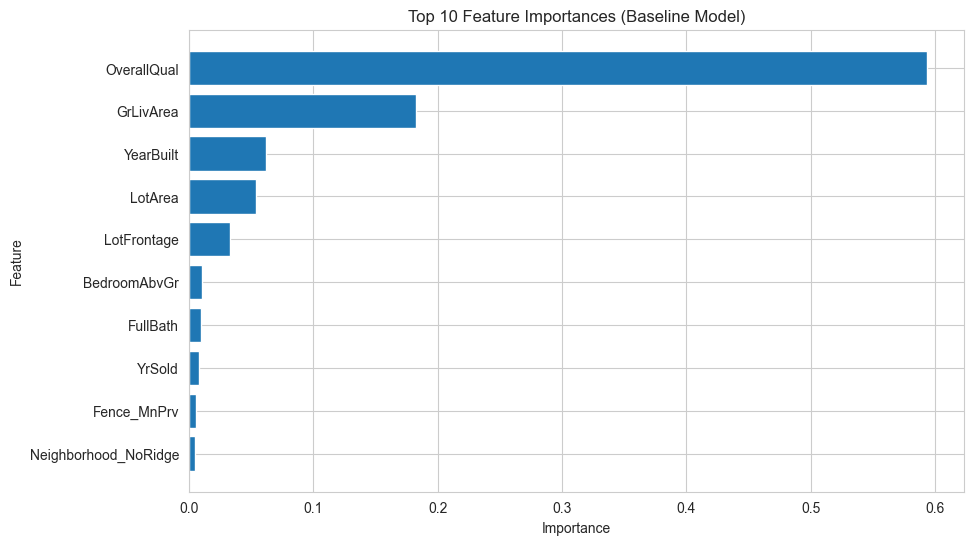


CHECKPOINT: Review which raw features are most important


In [ ]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model
# TODO: Create a horizontal bar plot of top 10 features

# Get Important Features
importances = baseline_model.feature_importances_
feature_names = X_train.columns

# Creating a dataframe 
feature_importance_df = pd.DataFrame({"Feature": feature_names,"Importance": importances}).sort_values(by="Importance", ascending=False)

# Top 10 features
top_10_features = feature_importance_df.head(10)

# Plot top 10 features
plt.barh(top_10_features["Feature"], top_10_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Baseline Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)


---
## Step 3: Engineer New Features

### Feature 1: [living_area_per_room] - [Interaction Feature]

**Business Justification:**
This feature measures the average amount of living space per room, giving how spacious a home feels. Homes with larger rooms are generally perceived as more comfortable and higher quality. Buyers often pay more for layouts with fewer but larger rooms rather than many small ones.

In [40]:
# TODO: Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df['living_area_per_room'] = df['GrLivArea'] / df['TotRmsAbvGrd']


### Feature 2: [years_since_remodel] - [Derived Metric]

**Business Justification:**
This feature measures how long it has been since the home was last remodeled at the time of sale. Homes that have been remodeled more recently tend to include updated kitchens, bathrooms, and finishes, which are more attractive to buyers. This results in recently remodeled homes often sell for higher prices than those that have not been updated.

In [41]:
# TODO: Create your second engineered feature
df['years_since_remodel'] = df['YrSold'] - df['YearRemodAdd']

### Feature 3: [has_garage] - [Categorical Combination]

**Business Justification:**
This feature indicates whether a home includes a garage. Garages add storage, convenience, and weather protection, especially in colder climates. Homes with garages are generally more valuable than those without.

In [42]:
# TODO: Create your third engineered feature
df['has_garage'] = (df['GarageCars'] > 0).astype(int)


### Feature 4: [quality_weighted_living_area] - [Quality-Based Feature]

**Business Justification:**
This feature combines house quality with living space to better show the idea that square footage is more valuable when the home is well built. A large home with poor quality like a overwhelming amout of rooms is less desirable than a large, high-quality home. Buyers are willing to pay more for high-quality space.

In [43]:
# TODO: Create your fourth engineered feature
df['quality_weighted_living_area'] = df['OverallQual'] * df['GrLivArea']


### Feature 5: [total_outdoor_space] - [Aggregation Feature]

**Business Justification:**
This feature represents the total usable outdoor space. Outdoor areas increase livability and entertainment, especially in residential neighborhoods. Homes with more outdoor space often attract higher sale prices and are generally more desirable.

In [44]:
# TODO: Create your fifth engineered feature
df['total_outdoor_space'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']


### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [ ]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [49]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
engineered_features = [
   "living_area_per_room",
    "years_since_remodel",
    "has_garage",
    "quality_weighted_living_area",
    "total_outdoor_space"
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

# TODO: Create X_engineered with all features
# Remember to handle missing values and encode categoricals
X_engineered = df[all_features]
  # Replace with your feature matrix

X_engineered = pd.get_dummies(X_engineered, drop_first=True)

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")

Total features in engineered model: 17
New engineered features: 5


In [50]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(n_estimators=100,random_state=42)  # Replace with trained model
engineered_model.fit(X_train_eng, y_train_eng)

# Make predictions
# TODO: Generate predictions on test set
engineered_predictions = engineered_model.predict(X_test_eng) # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = r2_score(y_test_eng, engineered_predictions)  # Replace with r2_score()
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8558955985842456
RMSE: $33,246.47


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [51]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
comparison = pd.DataFrame({"Model": ["Baseline", "Engineered"], "R2 Score": [baseline_r2, engineered_r2], "RMSE": [baseline_rmse, engineered_rmse]})  # Replace with pd.DataFrame()

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# TODO: Display comparison table
display(comparison)

print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")


MODEL COMPARISON


,Model,R2 Score,RMSE
0,Baseline,0.860943,32659.087059
1,Engineered,0.855896,33246.469989



R² Improvement: -0.59%
RMSE Improvement: -1.80%


### Visualize Feature Importances from Engineered Model

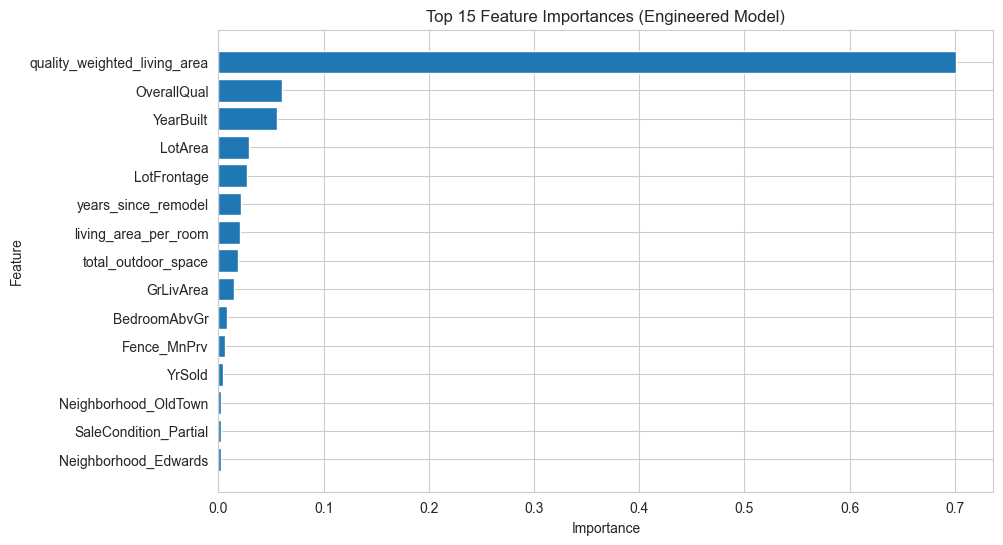

In [53]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
# TODO: Create horizontal bar plot of top 15 features

# Get Important Features
importances = engineered_model.feature_importances_
feature_names = X_train_eng.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Top 15
top_15_features = feature_importance_df.head(15)

# Plot
plt.barh(top_15_features["Feature"], top_15_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Engineered Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- Among the engineered features, "quality_weighted_living_area" appeared as the most important feature by a large margin. This suggests that combining overall house quality with living space captures an important factor buyers care about, where larger homes only add value if they are also well built.

- "Years_since_remodel" and "living_area_per_room" also appeared within the top features, showing that both recent updates and how spacious a home feels play a role in predicting sale price. Homes that feel newer or less cramped are generally more attractive to buyers.

- The has_garage feature did not appear as highly as expected, which may be because garage information is already captured by other related features such as garage size or number of garage spaces. This suggests that some engineered features may overlap with information already present in the baseline features.

- The total_outdoor_space feature showed moderate importance, indicating that outdoor areas do add value, but they are less influential than indoor quality and living space. This may reflect that buyers focus on the condition and layout of the home itself over additional outdoor features since it does include more things to take care of.

- Overall, this analysis shows that feature engineering is most useful when it combines multiple meaningful characteristics into a single feature, rather than simply adding more variables. If additional features were created, focusing on quality, layout, and how updated a home is would likely be more effective than adding features that repeat existing information.

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.